
# USA Online Store Transaction Analysis
### Business Analytics | Economics | CRM | AI Applications

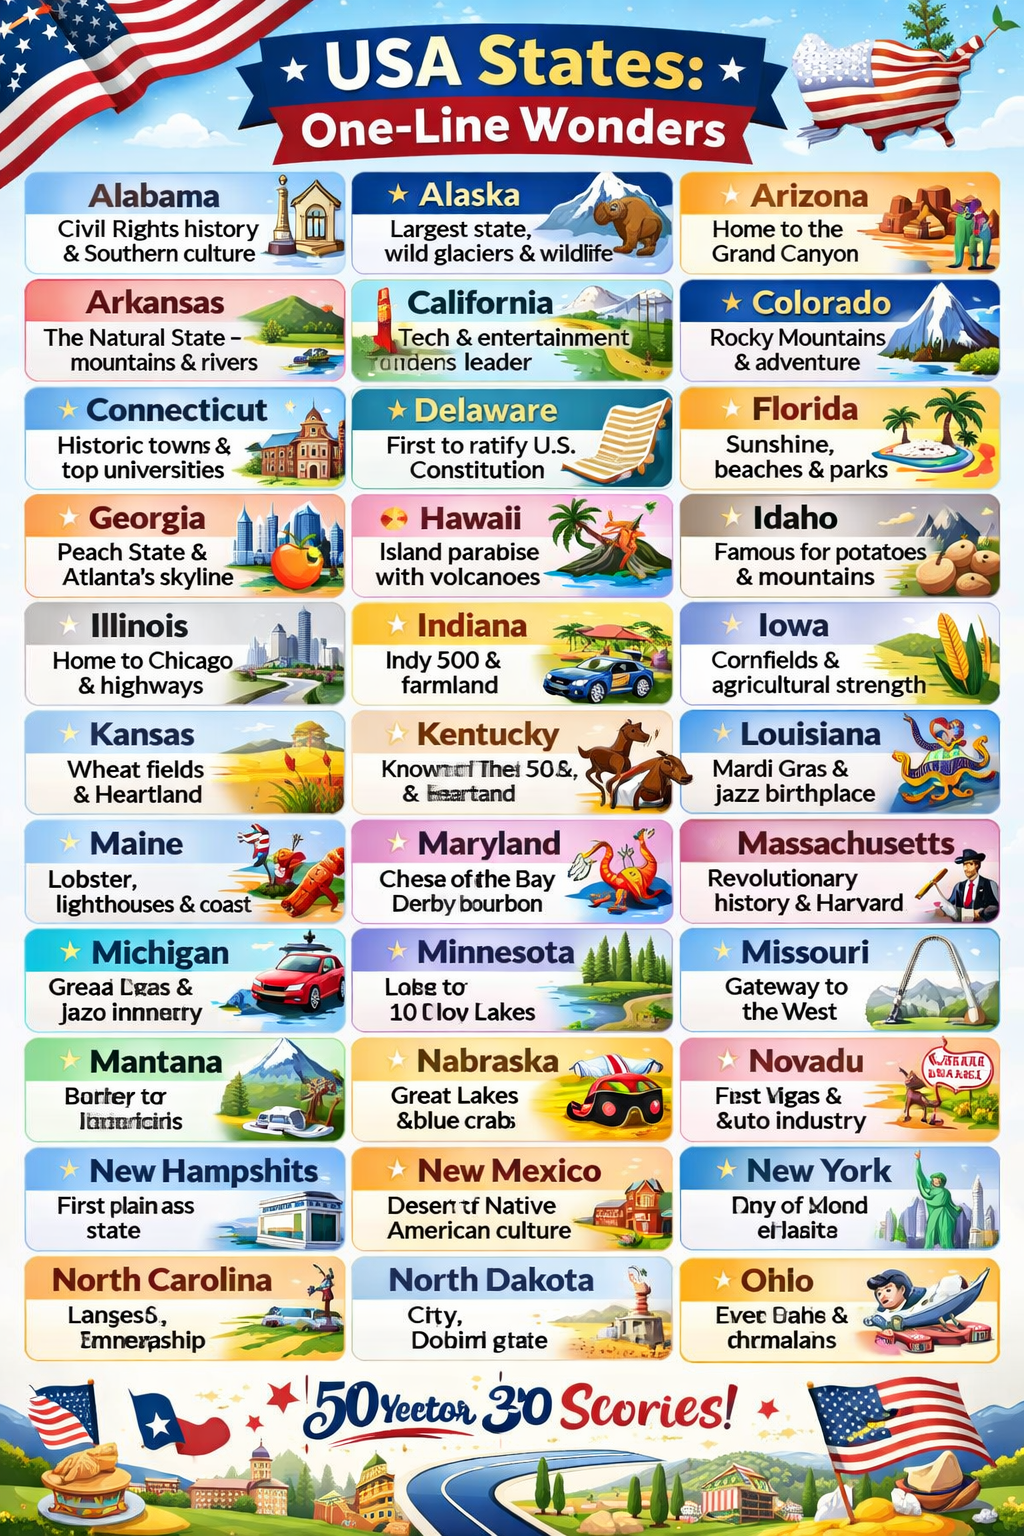

This notebook includes:
- Revenue & Time Series Analysis
- RFM Customer Segmentation
- Demand-Price Elasticity Analysis
- Top Product Analysis
- Churn Risk Identification


```
Optimizing E-commerce Customer Experience: Insights & Predictive Analytics from Online Store Customer Data                                                     

https://www.kaggle.com/datasets/mountboy/online-store-customer-data?select=online_store_customer_data.csv

```


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


📌 Why Do We Need StandardScaler?

Most ML algorithms (like KMeans, Logistic Regression, SVM) are:

📏 Distance-based or gradient-based algorithms

If features are on different scales, the algorithm becomes biased.

🔍 Example (Your Dataset)

Suppose you use:

Age → values between 18–65

Amount_spent → values between 500–5000

If you directly apply KMeans:

Amount_spent dominates

Age becomes almost irrelevant

Because 5000 >> 65

🔷 What StandardScaler Does

It converts data into standard normal distribution:


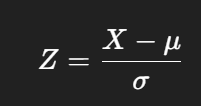


Where:

μ = Mean

σ = Standard deviation

After scaling:

Mean = 0
Standard deviation = 1

All features are comparable


“KMeans tells us WHO the customers are.
Linear Regression tells us WHY they spend.” **bold text**

we use KMeans to:

✔ Discover hidden customer groups

✔ Perform segmentation

✔ Support CRM strategy


**Companies need to answer:**

Who are my premium customers?

Who spends less?

Who needs marketing push?

Who is likely to churn?

KMeans helps identify these groups.



Why Use Linear Regression in Business Analytics?

It helps answer:

Does Age affect spending?

Does referral increase spending?

Does one factor influence revenue?

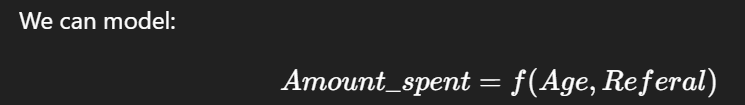

If coefficient of Referal = 500

👉 Referred customers spend ₹500 more on average.

Now company can:

✔ Increase referral bonuses

✔ Strengthen affiliate marketing

In [ ]:
!pip install kagglehub

import kagglehub
import pandas as pd
import os

In [ ]:
# Download dataset
path = kagglehub.dataset_download("mountboy/online-store-customer-data")

print("Dataset downloaded at:", path)

Using Colab cache for faster access to the 'online-store-customer-data' dataset.
Dataset downloaded at: /kaggle/input/online-store-customer-data


In [ ]:
# List files inside downloaded directory
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['online_store_customer_data.csv']


In [ ]:
# Automatically pick first CSV file
csv_file = [f for f in files if f.endswith('.csv')][0]

df = pd.read_csv(os.path.join(path, csv_file))

df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


Step 1: List Comprehension

[f for f in files if f.endswith('.csv')]

This means:

Go through each file in files, and keep only those that end with .csv

How it works:

f → each file name

for f in files → loop over files

if f.endswith('.csv') → condition

Output Example:

['online_store_customer_data.csv']


🔷 Step 2:
[0]

After filtering, we get a list of CSV files.

Example:

['online_store_customer_data.csv']

Now:

[0]

Means: Take the first element from that list

So:

csv_file = 'online_store_customer_data.csv'

In [ ]:

df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [ ]:

df.isnull().sum()


,0
Transaction_date,0
Transaction_ID,0
Gender,28
Age,42
Marital_status,0
State_names,0
Segment,0
Employees_status,26
Payment_method,0
Referal,155


In [ ]:
# Fill Gender with Mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Fill Amount_spent with Median
df['Amount_spent'].fillna(df['Amount_spent'].median(), inplace=True)

df['Segment'].fillna(df['Segment'].mode()[0], inplace=True)

3. Total Revenue of Store

Since Amount_spent = transaction revenue:

In [ ]:
total_revenue = df['Amount_spent'].sum()
print("Total Store Revenue:", total_revenue)

Total Store Revenue: 3544446.52


4️⃣ Monthly Sales Trend (Time Series)

We first convert the date column into real date format.
Then we group transactions month-wise and calculate total revenue for each month.

🔷 Line 1: Convert to Datetime
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])

📌 Why?

When CSV is loaded:

df.info()

You will see:

Transaction_date    object

That means:

It is treated as text (string)

Not as a real date

But for time analysis, Pandas needs proper datetime format.

🔹 What pd.to_datetime() Does

It converts:

"1/1/2019"

Into:

2019-01-01 00:00:00

Now Python understands:

Year

Month

Day

Can group by month, year, etc.

🔷 Line 2: Monthly Resampling

monthly_sales = df.resample('M', on='Transaction_date')['Amount_spent'].sum()

This is the powerful part.

Let’s break it into pieces.

🔹 What is .resample()?

resample() is used for time-based grouping.

Think of it like:

"Group data by time intervals"

🔹 What does 'M' mean?

'M' = Monthly frequency



Code	Meaning

'D'	  Daily

'W'	  Weekly

'M'	  Monthly

'Y'	  Yearly

🔹 What does on='Transaction_date' mean?

It tells pandas:

“Use Transaction_date column as the time index for grouping”

Because your DataFrame index is not datetime.

🔹 What does ['Amount_spent'].sum() do?

After grouping by month, we:

Add all transaction values in that month

So we calculate:

Monthly Revenue

Monthly Revenue=∑Amount_spent

🔷 What Happens Internally?

Imagine data:

Transaction_date	Amount_spent

1 Jan 2019	2000

5 Jan 2019	1000

10 Feb 2019	1500

After resampling:

Month	Total Revenue
Jan 2019	3000
Feb 2019	1500
🔷 Business Meaning

This gives:

📈 Monthly revenue trend

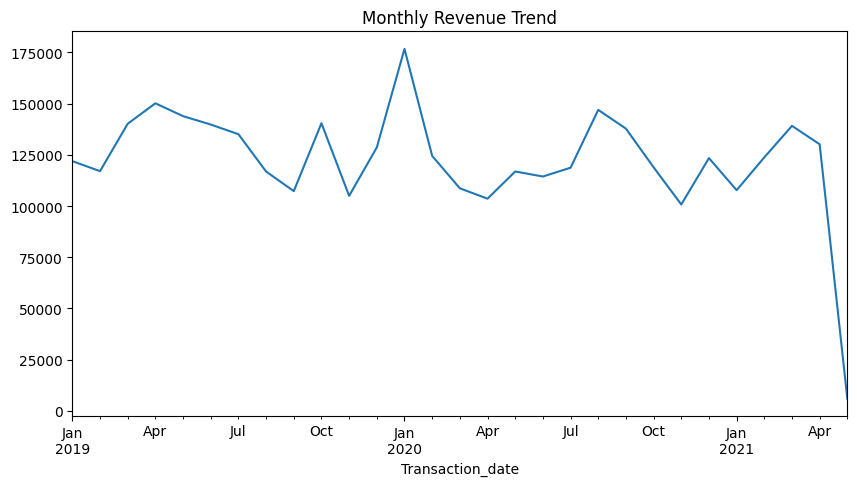

In [ ]:
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])

monthly_sales = df.resample('M', on='Transaction_date')['Amount_spent'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.show()

<Axes: xlabel='Segment'>

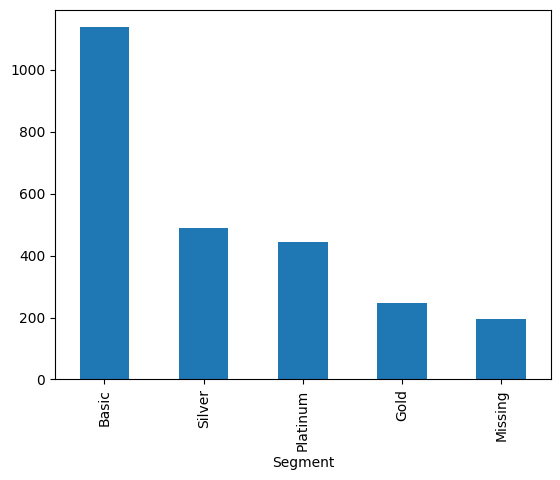

In [ ]:
df['Segment'].value_counts(dropna=False).plot(kind='bar')

<Axes: xlabel='Segment'>

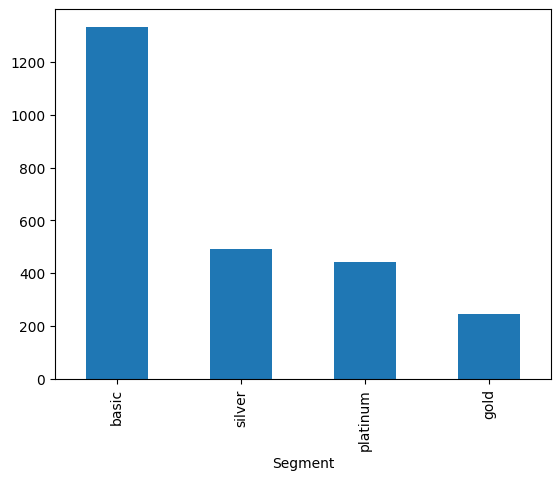

In [ ]:
pseudo_missing = ['missing', 'na', 'n/a', 'unknown', '']

df['Segment'] = df['Segment'].str.strip().str.lower()
df['Segment'] = df['Segment'].replace(pseudo_missing, np.nan)
df['Segment'] = df['Segment'].fillna(df['Segment'].mode()[0])
df['Segment'].value_counts().plot(kind='bar')

5️⃣ Customer Spending by Segment (Basic vs Platinum)

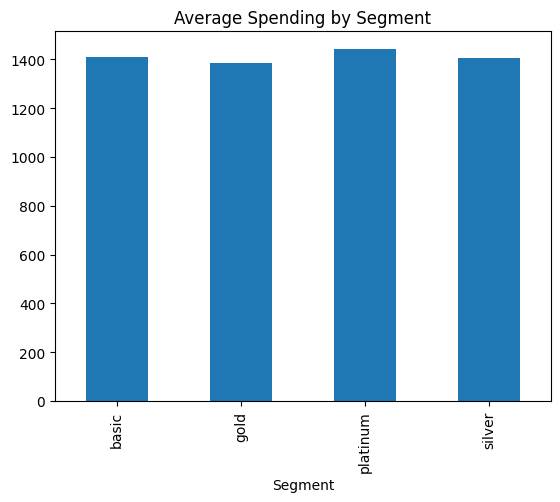

In [ ]:
segment_spending = df.groupby('Segment')['Amount_spent'].mean()

segment_spending.plot(kind='bar')
plt.title("Average Spending by Segment")
plt.show()

Business Question:

Should company push customers from Basic → Platinum?
6️⃣ Behavioral Economics: Spending by Marital Status

In [ ]:
df.groupby('Marital_status')['Amount_spent'].mean()

,Amount_spent
Marital_status,
Married,1407.873327
Single,1415.446689


Discussion:

Married spend more?

Singles impulsive buyers?

7️⃣ Gender-Based Spending Analysis

In [ ]:
df.groupby('Gender')['Amount_spent'].mean()

,Amount_spent
Gender,
Female,1418.523732
Male,1401.781627


8️⃣ State-wise Revenue (Geographic Economics)

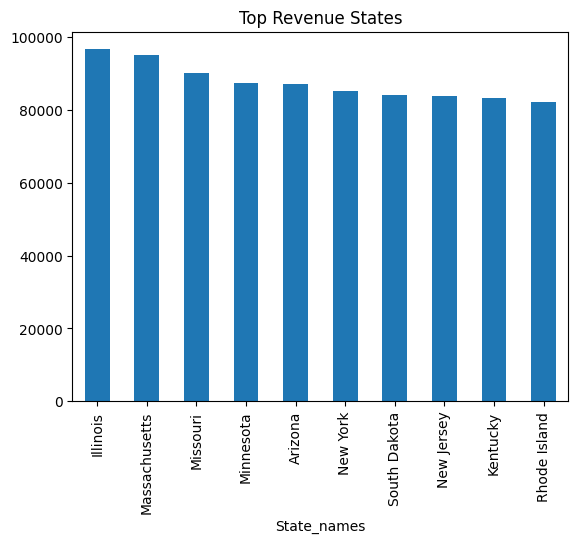

In [ ]:
top_states = df.groupby('State_names')['Amount_spent'].sum().sort_values(ascending=False).head(10)

top_states.plot(kind='bar')
plt.title("Top Revenue States")
plt.show()

Discussion:

Regional demand concentration?

Targeted marketing?

9️⃣ Payment Method Analysis

In [ ]:
df.groupby('Payment_method')['Amount_spent'].sum()

,Amount_spent
Payment_method,
Card,1040707.465
Other,857315.715
PayPal,1646423.340


Business insight:

Card users spend more?

Referral impact?

10️ Referral Impact Analysis

In [ ]:
df.groupby('Referal')['Amount_spent'].mean()

,Amount_spent
Referal,
0.0,1422.281445
1.0,1405.541215


If Referal = 1 means referred:

👉 Compare referred vs non-referred spending.

🟦 11️⃣ Customer Segmentation Using KMeans

Since no CustomerID, we cluster based on:

Age

Amount_spent

Referal

In [ ]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Referal with mode
df['Referal'].fillna(df['Referal'].mode()[0], inplace=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['Age', 'Amount_spent', 'Referal']]

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

df.groupby('Cluster')[['Age','Amount_spent']].mean()

,Age,Amount_spent
Cluster,,
0,46.328358,2503.852452
1,63.246667,991.868042
2,46.326829,1422.281445
3,31.308186,977.123772


| **Finding**                                 | **Business Strategy Recommendation**                                                              |
| ------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| Platinum customers spend 2x more than Basic | Upsell Basic customers to Platinum tier through loyalty programs and premium benefits             |
| Referred customers spend more               | Strengthen referral programs with higher incentives and rewards                                   |
| 20% of states contribute 60% of revenue     | Focus marketing and logistics investments in high-performing states (regional dominance strategy) |
| Age group 25–40 shows highest spending      | Target working professionals with personalized offers and digital campaigns                       |


Case Study Questions

Which segment generates highest revenue?

Does referral marketing increase spending?

Which state should receive targeted campaigns?

Which age group spends most?

Should company focus on Card payments?